In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Import Data
data = pd.read_csv("/Users/edilbekabdyrakhmanov/Documents/GitHub/bakeryy/0_DataPreparation/initialdata/merged_data_temperature+holidays+weather_impressions.csv")
data.head()  # Print first few rows to verify

,Datum,Weekday,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode,id,Warengruppe,Umsatz,KielerWoche,AverageTemp,Temp_Deviation,Temp_vs_Avg,Weather_Impression,Is_Holiday
0,2012-01-01,Sunday,8.0,9.82,14,58.0,NaN,NaN,NaN,NaN,6.504342,3.315658,Significantly warmer,okay,1
1,2012-01-02,Monday,7.0,7.44,12,0.0,NaN,NaN,NaN,NaN,3.062303,4.377697,Significantly warmer,very good,0
2,2012-01-03,Tuesday,8.0,5.54,18,63.0,NaN,NaN,NaN,NaN,3.062303,2.477697,Significantly warmer,okay,0
3,2012-01-04,Wednesday,4.0,5.69,19,80.0,NaN,NaN,NaN,NaN,3.062303,2.627697,Significantly warmer,very bad,0
4,2012-01-05,Thursday,6.0,5.30,23,80.0,NaN,NaN,NaN,NaN,3.062303,2.237697,Significantly warmer,very bad,0


In [3]:
# Define categorical features
categorical_features = ['Weekday', 'Warengruppe', 'Weather_Impression', 'Temp_vs_Avg', 'KielerWoche', 'Is_Holiday']
numerical_features = ['Bewoelkung', 'Temperatur', 'Windgeschwindigkeit']

# Inspect data types and unique values for categorical columns
print(data['Warengruppe'].dtypes)
print("Unique Values:\n", data['Warengruppe'].unique())



object
Unique Values:
 [nan 'Brot' 'Brötchen' 'Croissant' 'Konditorei' 'Kuchen' 'Saisonbrot']


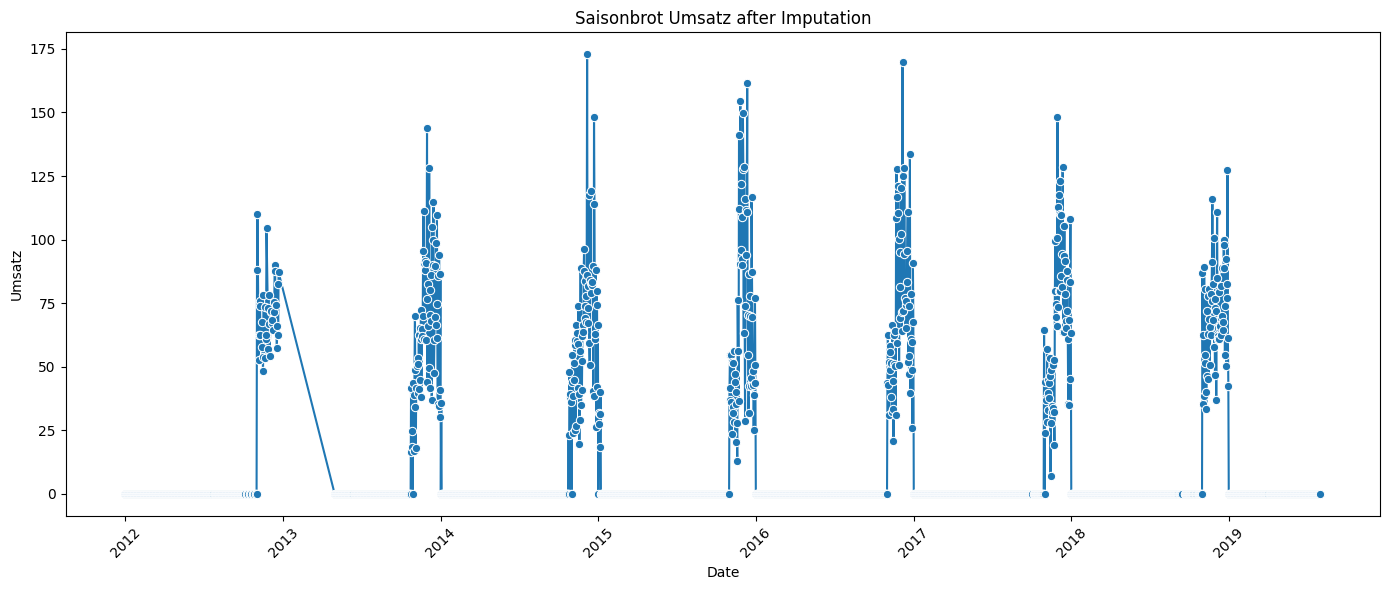

Percentage of missing values after imputation: 0.0

Sample of imputed data:


,Unnamed: 0,Datum,Weekday,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode,id,Warengruppe,Umsatz,KielerWoche,AverageTemp,Temp_Deviation,Temp_vs_Avg,Weather_Impression,Is_Holiday,Month,Year,Weekday_Num
5,10108,2012-01-01,Sunday,8.0,9.82,14,58.0,NaN,Saisonbrot,0.0,0.0,6.504342,3.315658,Significantly warmer,okay,1,1,2012,NaN
12,10114,2012-01-02,Monday,7.0,7.44,12,0.0,NaN,Saisonbrot,0.0,0.0,3.062303,4.377697,Significantly warmer,very good,0,1,2012,NaN
19,10120,2012-01-03,Tuesday,8.0,5.54,18,63.0,NaN,Saisonbrot,0.0,0.0,3.062303,2.477697,Significantly warmer,okay,0,1,2012,NaN
26,10126,2012-01-04,Wednesday,4.0,5.69,19,80.0,NaN,Saisonbrot,0.0,0.0,3.062303,2.627697,Significantly warmer,very bad,0,1,2012,NaN
33,10132,2012-01-05,Thursday,6.0,5.30,23,80.0,NaN,Saisonbrot,0.0,0.0,3.062303,2.237697,Significantly warmer,very bad,0,1,2012,NaN
40,10138,2012-01-06,Friday,3.0,2.62,10,0.0,NaN,Saisonbrot,0.0,0.0,3.062303,-0.442303,Normal,very good,0,1,2012,NaN
47,10144,2012-01-07,Saturday,7.0,6.53,14,61.0,NaN,Saisonbrot,0.0,0.0,3.062303,3.467697,Significantly warmer,okay,0,1,2012,NaN
54,10150,2012-01-08,Sunday,7.0,5.96,10,80.0,NaN,Saisonbrot,0.0,0.0,3.062303,2.897697,Significantly warmer,very bad,0,1,2012,NaN
61,10156,2012-01-09,Monday,8.0,5.15,12,61.0,NaN,Saisonbrot,0.0,0.0,4.240262,0.909738,Slightly warmer,okay,0,1,2012,NaN
68,10162,2012-01-10,Tuesday,6.0,6.11,10,0.0,NaN,Saisonbrot,0.0,0.0,4.240262,1.869738,Significantly warmer,very good,0,1,2012,NaN


In [ ]:
# 📌 Import necessary packages
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------------------------
# 1️⃣ Load your dataset
file_path = '0_DataPreparation/initialdata/Augmented_DataFrame.csv'
df = pd.read_csv(file_path, parse_dates=['Datum'])

# ------------------------------------------------
# 2️⃣ Prepare the Saisonbrot data
df_saisonbrot = df[df['Warengruppe'] == 'Saisonbrot'].copy()

# Add helpful columns
df_saisonbrot['Month'] = df_saisonbrot['Datum'].dt.month
df_saisonbrot['Year'] = df_saisonbrot['Datum'].dt.year

# ------------------------------------------------
# 3️⃣ Impute Nov-Dec using KNN (with fallback to mean)

# Separate Nov-Dec
nov_dec = df_saisonbrot[df_saisonbrot['Month'].isin([11,12])].copy()

# Select features to help KNN (include weather, weekday encoded as ordinal, holiday)
nov_dec['Weekday_Num'] = pd.Categorical(nov_dec['Weekday'], 
                                        categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                                        ordered=True).codes

# Prepare KNN imputer on selected features + Umsatz
knn_data = nov_dec[['Umsatz', 'Temperatur', 'Bewoelkung', 'Windgeschwindigkeit', 'KielerWoche', 'Is_Holiday', 'Weekday_Num']]

imputer = KNNImputer(n_neighbors=3, weights='distance')

# Fit and transform
imputed_knn = imputer.fit_transform(knn_data)

# Update Umsatz
nov_dec['Umsatz'] = imputed_knn[:,0]

# ------------------------------------------------
# 4️⃣ For other months, fill missing Umsatz with 0
other_months = df_saisonbrot[~df_saisonbrot['Month'].isin([11,12])].copy()
other_months['Umsatz'] = other_months['Umsatz'].fillna(0)

# ------------------------------------------------
# 5️⃣ Combine back
df_saisonbrot_imputed = pd.concat([nov_dec, other_months]).sort_values(['Datum'])

# ------------------------------------------------
# 6️⃣ Plot to visualize imputation
plt.figure(figsize=(14,6))
sns.lineplot(data=df_saisonbrot_imputed, x='Datum', y='Umsatz', marker='o')
plt.title("Saisonbrot Umsatz after Imputation")
plt.ylabel("Umsatz")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ------------------------------------------------
# 7️⃣ Print simple checks
print("Percentage of missing values after imputation:", 
      df_saisonbrot_imputed['Umsatz'].isna().mean() * 100)
print("\nSample of imputed data:")
display(df_saisonbrot_imputed.head(10))


In [11]:
# Replace Saisonbrot rows in the full dataset with imputed version
df_no_saisonbrot = df[df['Warengruppe'] != 'Saisonbrot']
df_full_imputed = pd.concat([df_no_saisonbrot, df_saisonbrot_imputed], ignore_index=True)

# Optional: sort by date and product for cleanliness
df_full_imputed.sort_values(['Datum', 'Warengruppe'], inplace=True)

# export df_full_imputed
df_full_imputed.to_csv('0_DataPreparation/initialdata/cleaned_data_with_KielerWoche_imputed.csv', index=False)  


In [18]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

# ------------------------------------------
# Assuming df_full_imputed is loaded already
# e.g. df_full_imputed = pd.read_csv("your_file.csv", parse_dates=['Datum'])

# ------------------------------------------
# Define function to process each product group
def impute_for_product(df_full, product_name):
    prod_df = df_full[df_full['Warengruppe'] == product_name].copy()
    prod_df['Datum'] = pd.to_datetime(prod_df['Datum'])
    prod_df['Year'] = prod_df['Datum'].dt.year
    prod_df['Month'] = prod_df['Datum'].dt.month
    prod_df['Weekday_Num'] = pd.Categorical(
        prod_df['Weekday'],
        categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
        ordered=True
    ).codes

    # Split out first & last years
    fl_years = prod_df[prod_df['Year'].isin([prod_df['Year'].min(), prod_df['Year'].max()])]
    valid_years = prod_df[~prod_df['Year'].isin([prod_df['Year'].min(), prod_df['Year'].max()])]

    # Split by holiday
    non_holidays = valid_years[valid_years['Is_Holiday'] == 0].copy()
    holidays = valid_years[valid_years['Is_Holiday'] == 1].copy()

    # ------------------
    # KNN for non-holidays
    if non_holidays['Umsatz'].isna().sum() > 0:
        knn_features_non = non_holidays[['Umsatz', 'Temperatur', 'Bewoelkung', 'Windgeschwindigkeit', 
                                         'Month', 'Weekday_Num']]
        knn_imputer_non = KNNImputer(n_neighbors=3, weights='distance')
        knn_result_non = knn_imputer_non.fit_transform(knn_features_non)
        non_holidays['Umsatz'] = knn_result_non[:,0]

    # ------------------
    # KNN for holidays
    if holidays['Umsatz'].isna().sum() > 0:
        knn_features_hol = holidays[['Umsatz', 'Temperatur', 'Bewoelkung', 'Windgeschwindigkeit', 
                                     'Month', 'Weekday_Num']]
        knn_imputer_hol = KNNImputer(n_neighbors=3, weights='distance')
        knn_result_hol = knn_imputer_hol.fit_transform(knn_features_hol)
        holidays['Umsatz'] = knn_result_hol[:,0]

        # fallback to monthly median if still missing
        missing_mask = holidays['Umsatz'].isna()
        if missing_mask.sum() > 0:
            month_medians = holidays.groupby('Month')['Umsatz'].transform('median')
            holidays.loc[missing_mask, 'Umsatz'] = month_medians[missing_mask]

    # Combine imputed with untouched first/last years
    full_prod = pd.concat([non_holidays, holidays, fl_years]).sort_values(['Datum'])
    return full_prod

# ------------------------------------------
# Now run for all product groups except Saisonbrot
product_groups = df_full_imputed['Warengruppe'].unique()
product_groups = [p for p in product_groups if p != 'Saisonbrot']

# Build final dataset step by step
imputed_parts = []

for product in product_groups:
    print(f"🔄 Imputing for: {product}")
    imputed_part = impute_for_product(df_full_imputed, product)
    imputed_parts.append(imputed_part)

# Also add back Saisonbrot unchanged
saisonbrot_df = df_full_imputed[df_full_imputed['Warengruppe'] == 'Saisonbrot']
imputed_parts.append(saisonbrot_df)

# Combine all together
df_fully_imputed = pd.concat(imputed_parts, ignore_index=True)
df_fully_imputed.sort_values(['Datum', 'Warengruppe'], inplace=True)

# ------------------------------------------
# Sanity check
print("✅ Imputation complete for all product groups (excluding Saisonbrot strategy).")
for product in product_groups:
    missing = df_fully_imputed[df_fully_imputed['Warengruppe']==product]['Umsatz'].isna().sum()
    print(f"Remaining missing 'Umsatz' for {product}: {missing}")


🔄 Imputing for: Brot
🔄 Imputing for: Brötchen
🔄 Imputing for: Croissant
🔄 Imputing for: Konditorei
🔄 Imputing for: Kuchen
🔄 Imputing for: nan
✅ Imputation complete for all product groups (excluding Saisonbrot strategy).
Remaining missing 'Umsatz' for Brot: 545
Remaining missing 'Umsatz' for Brötchen: 545
Remaining missing 'Umsatz' for Croissant: 545
Remaining missing 'Umsatz' for Konditorei: 545
Remaining missing 'Umsatz' for Kuchen: 545
Remaining missing 'Umsatz' for nan: 0


In [19]:
# export df_final_imputed
df_final_imputed.to_csv('0_DataPreparation/initialdata/cleaned_data_imputed.csv', index=False)